In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
#checkgpu
import torch
assert torch.cuda.is_available()
!nvidia-smi

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    use_auth_token=True,
    revision="fp16", torch_dtype=torch.float32,
    
).to("cuda")

pipe.safety_checker = lambda images, clip_input: (images, False)

vae\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

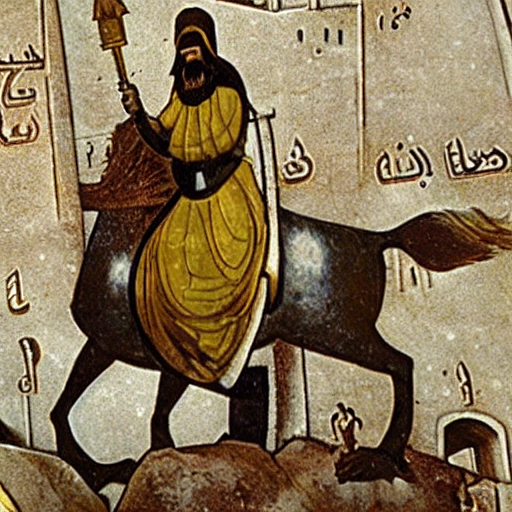

In [11]:
prompt = "Saladin conquered Jerusalem in 1187."
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"lovely_cat.png")
image